**Non-negative Least Squares**

We will fit a linear model with a positive constraints on the regression coefficients and compare the estimated coefficients to a classic linear regression(OLS). 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score


In [7]:
##Generating random data

np.random.seed(42)

n_samples, n_features = 200, 50

#Generating a 200 * 50 matrix of 200 samples with 50 features each, where each element is a random number drawn from a normal distribution(mean = 0, SD = 1)

X = np.random.randn(n_samples, n_features)

true_coef = 3 * np.random.randn(n_features)

#Setting the coefficients to be non-negative

true_coef[true_coef < 0] = 0

y = np.dot(X,true_coef)

#Adding some noise to simulate real-world data

y += 5 * np.random.normal(size = (n_samples,))



Splitting the data into test and train set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 20)

Fitting the non-negative least squares

In [17]:
from sklearn.linear_model import LinearRegression
reg_nnls = LinearRegression(positive = True). fit(X_train, y_train)
y_pred_nnls = reg_nnls.predict(X_test)
print(f'R2 Score NNLS: {r2_score(y_pred_nnls, y_test)}')

R2 Score NNLS: 0.848994172676881


Fitting the OLS model

In [19]:
reg_ols = LinearRegression().fit(X_train, y_train)
y_pred_ols = reg_ols.predict(X_test)
print(f'R2 Score OLS: {r2_score(y_pred_ols, y_test)}')

R2 Score OLS: 0.8562351091469984


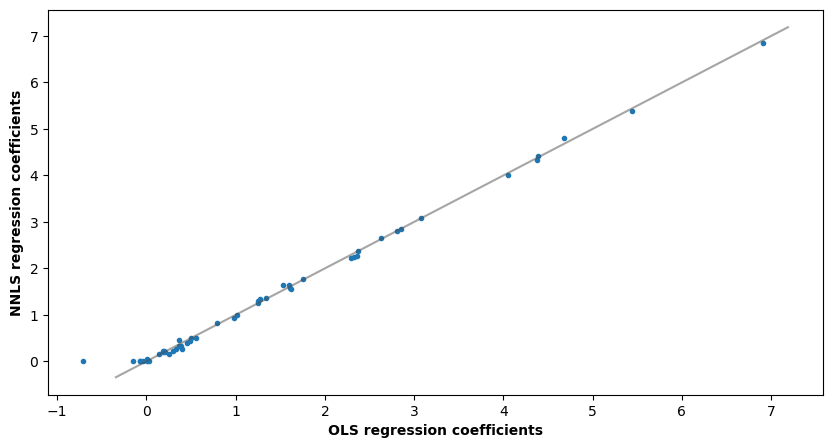

In [28]:
fig, ax = plt.subplots(figsize = (10,5))
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth = 0, marker = '.')

ax.set_xlabel('OLS regression coefficients', fontweight = 'bold')
ax.set_ylabel('NNLS regression coefficients', fontweight = 'bold')

low_x, high_x = ax.get_xlim()
low_y, high_y = ax. get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low,high], [low,high], ls = '-', c = '.3', alpha = 0.5)
